In [103]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [104]:
# create data

N = 2000

# generate data
data3 = torch.randint(low=-10, high=11, size=(N, 2)).float()

# "labels"
labels3 = torch.sum(data3, axis=1, keepdim=True)

# print the data
random_indices = torch.randint(low=0, high=N, size=(10,))
for i in random_indices:
    print(data3[i], labels3[i])

tensor([-5., -1.]) tensor([-6.])
tensor([0., 4.]) tensor([4.])
tensor([ 7., -2.]) tensor([5.])
tensor([-8.,  2.]) tensor([-6.])
tensor([-10.,   3.]) tensor([-7.])
tensor([-6., 10.]) tensor([4.])
tensor([-9.,  3.]) tensor([-6.])
tensor([-5.,  3.]) tensor([-2.])
tensor([ 0., -6.]) tensor([-6.])
tensor([ 9., -5.]) tensor([4.])


In [105]:
class ANNmodel(nn.Module):
    def __init__(self):
        super(ANNmodel, self).__init__()
        self.input_layer = nn.Linear(2, 4)
        self.output_layer = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        x = self.output_layer(x)
        return x

def createADDmodel():
    model  = ANNmodel()
    lossfun = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    return model, lossfun, optimizer

# Train the model

In [106]:
# trains the model
def train_a_model(numepochs=10):

    losses = torch.zeros(numepochs)
    model, lossfun, optimizer = createADDmodel()

    for epochi in range(numepochs):

        numloss = []
        # loop through "minibatches" of N=1
        for num, ans in zip(data3, labels3):

            # forward pass
            yHat = model(num)

            # compute loss
            loss = lossfun(yHat, ans)
            numloss.append(loss.item())

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        losses[epochi] = np.mean(numloss)

    # final forward pass
    with torch.no_grad():
        predictions = model(data3)

    # compute the predictions and report accuracy (is this really different from loss?)
    trainacc = 100 * torch.mean(torch.eq(torch.round(predictions), labels3).float())

    ### now test with new data!
    # create brand new test data
    TESTdata = torch.randint(low=-10, high=11, size=(N, 2)).float()
    TESTlabels = torch.sum(TESTdata, axis=1, keepdim=True)

    # evaluate the model and compute accuracy
    with torch.no_grad():
        predictions = model(TESTdata)
    testacc = 100 * torch.mean(torch.eq(torch.round(predictions), TESTlabels).float())

    # EOF
    return losses, trainacc, testacc, model

In [107]:
# test the model once to make sure it runs
losses, trainacc, testacc, ADDmodel = train_a_model(5)

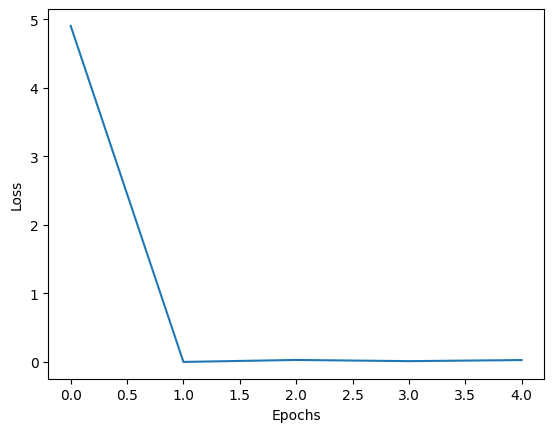

In [108]:
# plot the loss
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

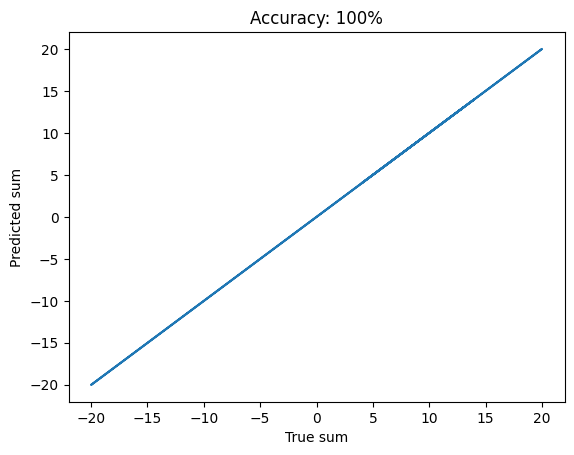

In [109]:
# test model with new data
data3 = torch.randint(low=-10, high=11, size=(1000, 2)).float()
labels3 = torch.sum(data3, axis=1, keepdim=True)
predictions = ADDmodel(data3)

accuracy = 100 * torch.mean(torch.eq(torch.round(predictions), labels3).float())
plt.plot(labels3.detach(), predictions.detach())
plt.xlabel('True sum')
plt.ylabel('Predicted sum')
plt.title('Accuracy: %d%%' % accuracy)
plt.show()


In [111]:
# run the model 10 times to check reproducibility
for i in range(10):
  # create a new 'machine' and train it
  _, trainacc, testacc, _ = train_a_model(5)
  # report accuracy
  print('Model instance %s, final TRAIN/TEST accuracies: %g%%, %g%%' %(i+1,trainacc,testacc))

Model instance 1, final TRAIN/TEST accuracies: 67.6%, 67.45%
Model instance 2, final TRAIN/TEST accuracies: 100%, 100%
Model instance 3, final TRAIN/TEST accuracies: 64.1%, 58.95%
Model instance 4, final TRAIN/TEST accuracies: 92.3%, 92.5%
Model instance 5, final TRAIN/TEST accuracies: 100%, 100%
Model instance 6, final TRAIN/TEST accuracies: 100%, 100%
Model instance 7, final TRAIN/TEST accuracies: 100%, 100%
Model instance 8, final TRAIN/TEST accuracies: 100%, 100%
Model instance 9, final TRAIN/TEST accuracies: 100%, 100%
Model instance 10, final TRAIN/TEST accuracies: 100%, 100%


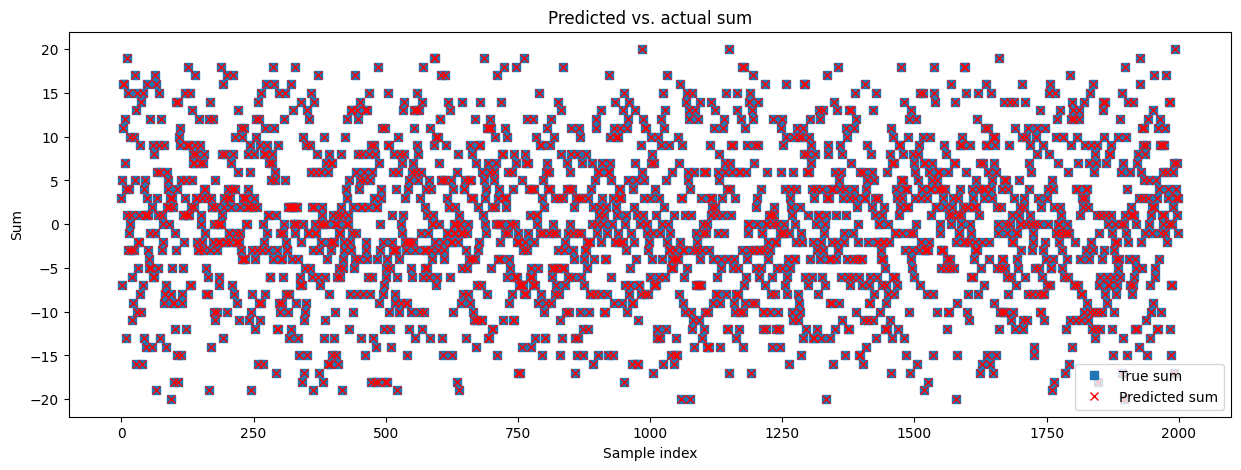

In [112]:
# some plots from the final model
data3 = torch.randint(low=-10, high=11, size=(N, 2)).float()
labels3 = torch.sum(data3, axis=1, keepdim=True)

# evaluate the model and compute accuracy
with torch.no_grad():
    predictions = ADDmodel(data3)

# true and predicted values
fig = plt.figure(figsize=(15, 5))
plt.plot(labels3, "s")
plt.plot(np.round(predictions.detach()), "rx")
plt.legend(["True sum", "Predicted sum"])
plt.xlabel("Sample index")
plt.ylabel("Sum")
plt.title("Predicted vs. actual sum")
plt.show()